
<img src="https://cdn.firstcry.com/education/2022/10/08180421/I-Like-To-Eat-Apples-And-Bananas-Nursery-Rhyme2-1.jpg" width="400px">





- apple width ≈ 6cm
- apple length ≈ 6cm
- banana width ≈ 4cm
- banana length ≈ 8cm


apple : 0

banana : 1



In [156]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [157]:
def generate_dataset(n):
    apple_width = np.random.normal(6,1,n)
    apple_length = np.random.normal(6,1,n)
    banana_width = np.random.normal(4,1,n)
    banana_length = np.random.normal(8,1,n)

    width = np.concatenate((apple_width , banana_width))
    length = np.concatenate((apple_length , banana_length))
    X = np.array([width , length]).T

    Y_apples = np.zeros(n ,dtype='int')
    Y_banana = np.ones(n,dtype='int')
    Y = np.concatenate((Y_apples ,Y_banana))

    return X , Y

In [158]:
X_train ,Y_train = generate_dataset(100)

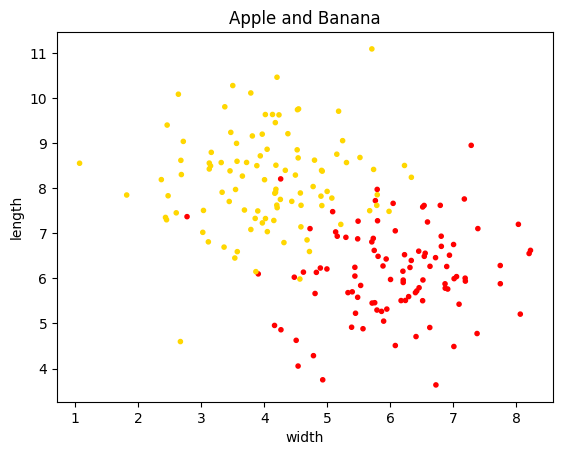

In [159]:

cmap = ['red' ,'gold']
plt.scatter(X_train[: ,0],X_train[: ,1], c=Y_train , cmap=ListedColormap(cmap) , marker='.')
plt.xlabel("width")
plt.ylabel("length")
plt.title("Apple and Banana")
plt.show()  

In [160]:
from knn import KNN


In [161]:
knn = KNN(k=5)
knn.fit(X_train ,Y_train)


In [162]:
new_fruit=np.array([3,8.4])
new_fruit_2=np.array([6,6])
new_fruit_3=np.array([2,7])

new_fruits=[new_fruit , new_fruit_2 , new_fruit_3]

outputs = knn.predict(new_fruits)


In [163]:
for output in outputs :
    if output == 0 :
        print("🍎")
    else:
        print("🍌")


🍌
🍎
🍌


In [164]:
X_test , Y_test = generate_dataset(90)

In [165]:
X_test[:5]

array([[6.34799658, 6.21203565],
       [6.18693459, 5.01276588],
       [4.55265823, 5.92300143],
       [6.61929994, 5.46567748],
       [4.33589581, 7.17168149]])

In [166]:
knn.evaluate(X_test,Y_test)

0.9166666666666666

In [167]:
Y_pred = knn.predict(X_test)

Y_pred 

[0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [168]:
confusion_matrix = np.zeros((2,2))

for i in range(180) :
    if Y_test[i]==0 and Y_pred[i]==0 :
        confusion_matrix[0][0] += 1

    elif Y_test[i]==0 and Y_pred[i]==1 :
        confusion_matrix[1][0] += 1

    elif Y_test[i]==1 and Y_pred[i]==0 :
        confusion_matrix[0][1] += 1
        
    elif Y_test[i]==1 and Y_pred[i]==1 :
        confusion_matrix[1][1] += 1

confusion_matrix

array([[82.,  7.],
       [ 8., 83.]])

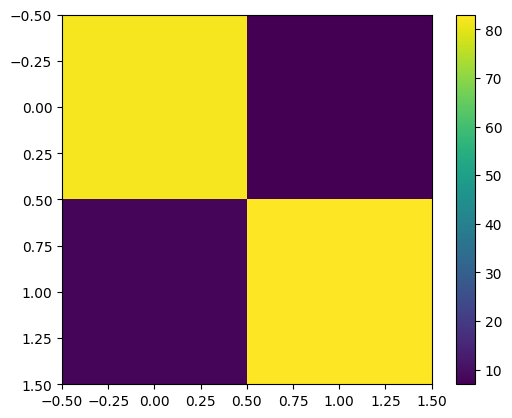

In [169]:
plt.imshow(confusion_matrix)
plt.colorbar()
plt.show()

In [170]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train ,Y_train)

knn.predict(new_fruits)

array([1, 0, 1])

In [171]:
knn.score(X_test ,Y_test)

0.9166666666666666